In [1]:
#download the dataset from the following link
#https://www.kaggle.com/datasets/pedrohauy/sampledtftpattackcicddos2019

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [3]:
dataset=pd.read_csv('TFTP_mini.csv')
dataset

C:\Users\anirb\AppData\Local\Temp\ipykernel_21316\966661884.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv('TFTP_mini.csv')


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,36815,172.16.0.5-192.168.50.1-44669-27661-17,172.16.0.5,44669,192.168.50.1,27661,17,2018-12-01 13:41:11.669699,3006788,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
1,111158,172.16.0.5-192.168.50.1-26607-47973-6,172.16.0.5,26607,192.168.50.1,47973,6,2018-12-01 13:34:35.248008,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
2,50970,172.16.0.5-192.168.50.1-62744-29235-17,172.16.0.5,62744,192.168.50.1,29235,17,2018-12-01 13:40:34.055555,6001231,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
3,35641,172.16.0.5-192.168.50.1-62504-28295-17,172.16.0.5,62504,192.168.50.1,28295,17,2018-12-01 13:40:25.825426,6010191,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
4,175243,172.16.0.5-192.168.50.1-22126-22126-6,172.16.0.5,22126,192.168.50.1,22126,6,2018-12-01 13:34:32.812922,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201074,26366,172.16.0.5-192.168.50.1-62468-52690-17,172.16.0.5,62468,192.168.50.1,52690,17,2018-12-01 14:01:56.458423,18000007,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
201075,7628,172.16.0.5-192.168.50.1-62502-28180-17,172.16.0.5,62502,192.168.50.1,28180,17,2018-12-01 14:01:07.922695,11998985,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
201076,18338,172.16.0.5-192.168.50.1-62492-10553-17,172.16.0.5,62492,192.168.50.1,10553,17,2018-12-01 14:04:36.624050,18000058,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
201077,14639,172.16.0.5-192.168.50.1-41987-42708-17,172.16.0.5,41987,192.168.50.1,42708,17,2018-12-01 14:01:16.934974,3006606,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP


In [4]:
dataset.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,36815,172.16.0.5-192.168.50.1-44669-27661-17,172.16.0.5,44669,192.168.50.1,27661,17,2018-12-01 13:41:11.669699,3006788,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
1,111158,172.16.0.5-192.168.50.1-26607-47973-6,172.16.0.5,26607,192.168.50.1,47973,6,2018-12-01 13:34:35.248008,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
2,50970,172.16.0.5-192.168.50.1-62744-29235-17,172.16.0.5,62744,192.168.50.1,29235,17,2018-12-01 13:40:34.055555,6001231,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
3,35641,172.16.0.5-192.168.50.1-62504-28295-17,172.16.0.5,62504,192.168.50.1,28295,17,2018-12-01 13:40:25.825426,6010191,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
4,175243,172.16.0.5-192.168.50.1-22126-22126-6,172.16.0.5,22126,192.168.50.1,22126,6,2018-12-01 13:34:32.812922,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP


In [5]:
dataset.isnull().sum()

Unnamed: 0         0
Flow ID            0
 Source IP         0
 Source Port       0
 Destination IP    0
                  ..
 Idle Max          0
 Idle Min          0
SimillarHTTP       0
 Inbound           0
 Label             0
Length: 88, dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201079 entries, 0 to 201078
Data columns (total 88 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    201079 non-null  int64  
 1   Flow ID                       201079 non-null  object 
 2    Source IP                    201079 non-null  object 
 3    Source Port                  201079 non-null  int64  
 4    Destination IP               201079 non-null  object 
 5    Destination Port             201079 non-null  int64  
 6    Protocol                     201079 non-null  int64  
 7    Timestamp                    201079 non-null  object 
 8    Flow Duration                201079 non-null  int64  
 9    Total Fwd Packets            201079 non-null  int64  
 10   Total Backward Packets       201079 non-null  int64  
 11  Total Length of Fwd Packets   201079 non-null  float64
 12   Total Length of Bwd Packets  201079 non-nul

In [7]:
dataset.shape

(201079, 88)

In [8]:
dataset['Flow ID'].unique()

array(['172.16.0.5-192.168.50.1-44669-27661-17',
       '172.16.0.5-192.168.50.1-26607-47973-6',
       '172.16.0.5-192.168.50.1-62744-29235-17', ...,
       '172.16.0.5-192.168.50.1-62492-10553-17',
       '172.16.0.5-192.168.50.1-41987-42708-17',
       '172.16.0.5-192.168.50.1-50129-28870-17'], dtype=object)

In [10]:
dataset[' Label'].unique()

array(['TFTP', 'BENIGN'], dtype=object)

In [11]:
dataset[' Inbound'].unique()

array([1, 0], dtype=int64)

In [12]:
dataset[' Label']=dataset[' Label'].replace('TFTP',1)
dataset[' Label']=dataset[' Label'].replace('BENIGN',0)
dataset.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,36815,172.16.0.5-192.168.50.1-44669-27661-17,172.16.0.5,44669,192.168.50.1,27661,17,2018-12-01 13:41:11.669699,3006788,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
1,111158,172.16.0.5-192.168.50.1-26607-47973-6,172.16.0.5,26607,192.168.50.1,47973,6,2018-12-01 13:34:35.248008,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
2,50970,172.16.0.5-192.168.50.1-62744-29235-17,172.16.0.5,62744,192.168.50.1,29235,17,2018-12-01 13:40:34.055555,6001231,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
3,35641,172.16.0.5-192.168.50.1-62504-28295-17,172.16.0.5,62504,192.168.50.1,28295,17,2018-12-01 13:40:25.825426,6010191,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
4,175243,172.16.0.5-192.168.50.1-22126-22126-6,172.16.0.5,22126,192.168.50.1,22126,6,2018-12-01 13:34:32.812922,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1


In [13]:
y=dataset[' Label']

In [14]:
dataset[' Label'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:>

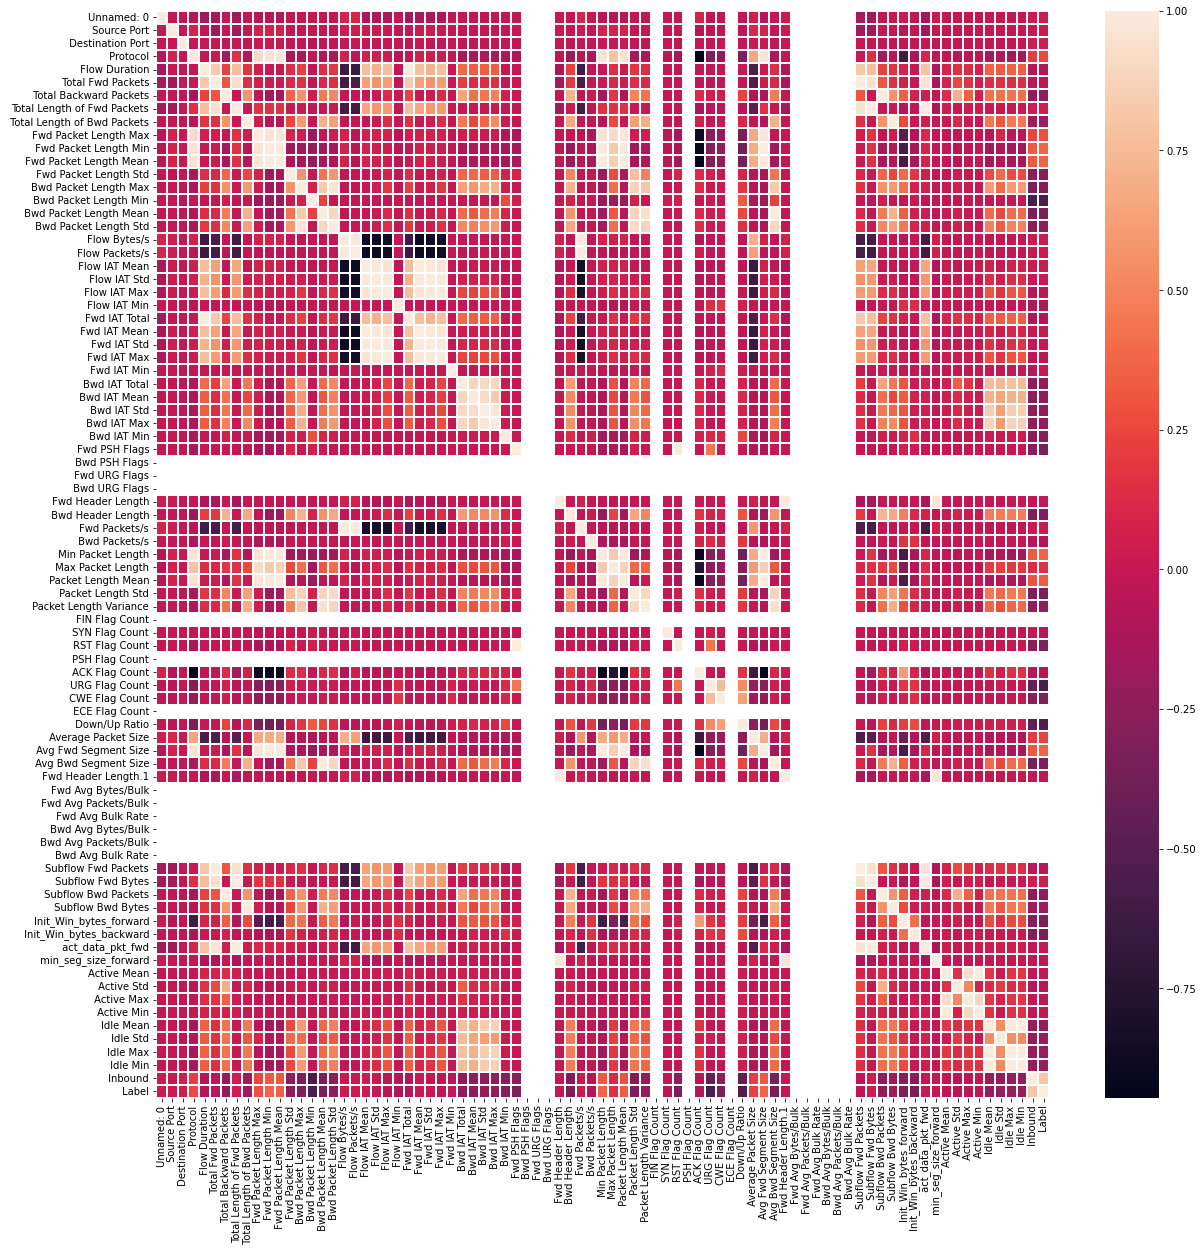

In [15]:
fig, ax = mp.subplots(figsize=(20,20))
sb.heatmap(dataset.corr(),linewidths=0.3)

In [16]:
dataset.drop([' Total Backward Packets',' Total Length of Bwd Packets',' Fwd Packet Length Std','Bwd Packet Length Max',' Bwd Packet Length Min',' Bwd Packet Length Mean',' Bwd Packet Length Std','Bwd IAT Total',' Bwd IAT Mean',' Bwd IAT Std',' Bwd IAT Max',' Bwd IAT Min','Fwd PSH Flags',' Bwd Header Length',' Packet Length Std',' Packet Length Variance',' RST Flag Count',' URG Flag Count',' CWE Flag Count',' Down/Up Ratio',' Avg Bwd Segment Size',' Subflow Bwd Bytes',' Subflow Bwd Packets','Init_Win_bytes_forward',' Init_Win_bytes_backward','Idle Mean',' Idle Std',' Idle Max',' Idle Min'],axis=1,inplace=True)

In [17]:
dataset.shape

(201079, 59)

In [18]:
le= preprocessing.LabelEncoder()

In [19]:
dataset.select_dtypes(include=['object']).columns.tolist()

['Flow ID', ' Source IP', ' Destination IP', ' Timestamp', 'SimillarHTTP']

In [20]:
dataset['Flow ID']=le.fit_transform(dataset['Flow ID'])
dataset[' Source IP']=le.fit_transform(dataset[' Source IP'])
dataset[' Destination IP']=le.fit_transform(dataset[' Destination IP'])
dataset[' Timestamp']=le.fit_transform(dataset[' Timestamp'])

In [21]:
dataset['SimillarHTTP'].unique()
dataset['SimillarHTTP'] = dataset['SimillarHTTP'].astype(str)
dataset['SimillarHTTP']=le.fit_transform(dataset['SimillarHTTP'])

In [22]:
dataset.select_dtypes(include=['float64']).columns.tolist()

['Total Length of Fwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Min Packet Length',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Average Packet Size',
 ' Avg Fwd Segment Size',
 'Active Mean',
 ' Active Std',
 ' Active Max',
 ' Active Min']

In [23]:
dataset['Total Length of Fwd Packets'].unique()
dataset['Total Length of Fwd Packets'] = dataset['Total Length of Fwd Packets'].astype(int)
dataset[' Fwd Packet Length Max'] = dataset[' Fwd Packet Length Max'].astype(int)
dataset[' Fwd Packet Length Min'] = dataset[' Fwd Packet Length Min'].astype(int)
dataset[' Fwd Packet Length Mean'] = dataset[' Fwd Packet Length Mean'].astype(int)
dataset[' Flow IAT Mean'] = dataset[' Flow IAT Mean'].astype(int)
dataset[' Flow IAT Std'] = dataset[' Flow IAT Std'].astype(int)
dataset[' Flow IAT Max'] = dataset[' Flow IAT Max'].astype(int)
dataset[' Flow IAT Min'] = dataset[' Flow IAT Min'].astype(int)
dataset['Fwd IAT Total'] = dataset['Fwd IAT Total'].astype(int)
dataset[' Fwd IAT Mean'] = dataset[' Fwd IAT Mean'].astype(int)
dataset[' Fwd IAT Std'] = dataset[' Flow IAT Std'].astype(int)
dataset[' Fwd IAT Max'] = dataset[' Fwd IAT Max'].astype(int)
dataset[' Fwd IAT Min'] = dataset[' Fwd IAT Min'].astype(int)
dataset['Fwd Packets/s'] = dataset['Fwd Packets/s'].astype(int)
dataset[' Bwd Packets/s'] = dataset[' Bwd Packets/s'].astype(int)
dataset[' Min Packet Length'] = dataset[' Min Packet Length'].astype(int)
dataset[' Max Packet Length'] = dataset[' Max Packet Length'].astype(int)
dataset[' Packet Length Mean'] = dataset[' Packet Length Mean'].astype(int)
dataset[' Average Packet Size'] = dataset[' Average Packet Size'].astype(int)
dataset[' Avg Fwd Segment Size'] = dataset[' Avg Fwd Segment Size'].astype(int)
dataset['Active Mean'] = dataset['Active Mean'].astype(int)
dataset[' Active Std'] = dataset[' Active Std'].astype(int)
dataset[' Active Max'] = dataset[' Active Max'].astype(int)
dataset[' Active Min'] = dataset[' Active Min'].astype(int)
dataset['Flow Bytes/s'] = dataset['Flow Bytes/s'].apply("int64")
dataset[' Flow Packets/s'] = dataset[' Flow Packets/s'].apply("int64")

In [24]:
dataset.select_dtypes(include=['float64']).columns.tolist()

[]

In [25]:
x=dataset.drop(labels=[' Label'],axis=1)
y=dataset[' Label']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(dataset.drop(labels=[' Label'],axis=1),dataset[' Label'],test_size=0.8,random_state=0)
x_train.shape,x_test.shape

((40215, 58), (160864, 58))

In [27]:
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([1.66869741e-03, 1.09950962e-02, 2.03900617e-02, 4.95329791e-03,
       2.30020164e-02, 8.47333385e-03, 1.58567007e-02, 6.95360726e-03,
       7.69221986e-03, 6.43834216e-03, 1.15569459e-02, 2.10514832e-02,
       2.02124506e-02, 2.17261528e-02, 1.26626572e-03, 2.49637344e-04,
       7.58349131e-03, 7.24418247e-03, 7.61770280e-03, 2.84390394e-03,
       3.73937447e-03, 3.74022998e-03, 7.21327352e-03, 3.36038319e-03,
       4.25024251e-03, 0.00000000e+00, 2.28276251e-04, 8.93034684e-05,
       3.99613618e-03, 9.28469277e-03, 6.90035062e-03, 2.05370730e-02,
       2.00598578e-02, 2.08611110e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.21051887e-04, 0.00000000e+00, 1.23126070e-02,
       2.08443092e-02, 3.87938130e-03, 0.00000000e+00, 0.00000000e+00,
       4.26653480e-04, 2.71392960e-04, 0.00000000e+00, 0.00000000e+00,
       6.44818418e-03, 1.14186185e-02, 6.03708030e-03, 1.68578920e-03,
       8.49655818e-04, 7.46692864e-05, 5.84220608e-04, 8.55620446e-04,
      

In [28]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

 Destination IP                0.023002
 Fwd Packet Length Mean        0.021726
 Fwd Packet Length Max         0.021051
 Packet Length Mean            0.020861
 Avg Fwd Segment Size          0.020844
 Min Packet Length             0.020537
 Source IP                     0.020390
 Fwd Packet Length Min         0.020212
 Max Packet Length             0.020060
 Inbound                       0.017385
 Protocol                      0.015857
 Average Packet Size           0.012313
Total Length of Fwd Packets    0.011557
 Subflow Fwd Bytes             0.011419
Flow ID                        0.010995
Fwd Packets/s                  0.009285
 Destination Port              0.008473
 Flow Duration                 0.007692
 Flow IAT Max                  0.007618
 Flow IAT Mean                 0.007583
 Flow IAT Std                  0.007244
 Fwd IAT Std                   0.007213
 Timestamp                     0.006954
 Bwd Packets/s                 0.006900
Subflow Fwd Packets            0.006448


<AxesSubplot:>

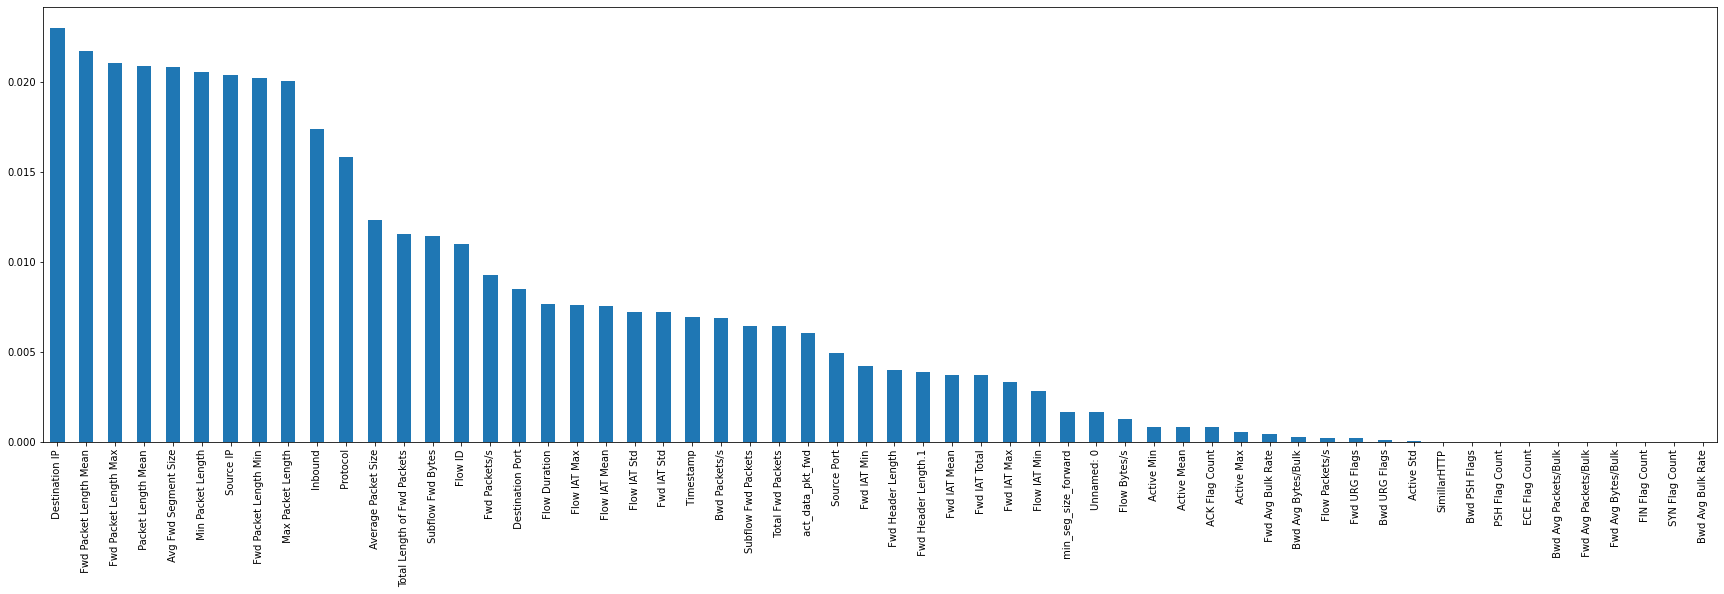

In [29]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(30,8))

In [30]:
cols=SelectKBest(mutual_info_classif,k=30)
cols.fit(x_train.fillna(0),y_train)
x_train.columns[cols.get_support()]

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', 'Total Length of Fwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Flow IAT Mean', ' Flow IAT Std',
       ' Flow IAT Max', ' Fwd IAT Std', ' Fwd IAT Min', ' Fwd Header Length',
       'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length',
       ' Max Packet Length', ' Packet Length Mean', ' Average Packet Size',
       ' Avg Fwd Segment Size', 'Subflow Fwd Packets', ' Subflow Fwd Bytes',
       ' act_data_pkt_fwd', ' Inbound'],
      dtype='object')

In [31]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
x_train_accuracy=model.predict(x_train)
train_accuracy=accuracy_score(x_train_accuracy,y_train)
train_accuracy

1.0

In [38]:
x_test_accuracy=model.predict(x_test)
test_accuracy=accuracy_score(x_test_accuracy,y_test)
print(test_accuracy)
from sklearn.metrics import classification_report
print(classification_report(x_test_accuracy,y_test))

0.9999875671374577
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       214
           1       1.00      1.00      1.00    160650

    accuracy                           1.00    160864
   macro avg       1.00      1.00      1.00    160864
weighted avg       1.00      1.00      1.00    160864



In [36]:
from sklearn.model_selection import KFold, cross_val_score

In [39]:
model=model.fit(x_train,y_train)
scores=cross_val_score(model, x_train, y_train, scoring='r2', cv=58)
scores

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        , -0.00144509,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ])

In [40]:
print(np.mean(scores))

0.9827337054016344


In [41]:
from sklearn.model_selection import cross_val_predict

In [42]:
predict=cross_val_predict(model,x_test,y_test)
predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [43]:
scores_test=cross_val_score(model,x_test,y_test,cv=58)
scores_test

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99963951, 1.        , 0.99963951,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99963938, 1.        ,
       1.        , 1.        , 1.        ])

In [44]:
print(np.mean(scores_test))

0.9999813517103382


In [45]:
#SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import svm

In [46]:
classes=4
x,t= make_classification(100, 5, n_classes=classes, random_state=40, n_informative=2, n_clusters_per_class=1)
x_train,x_test,y_train,y_test= train_test_split(x, t, test_size=0.50)

model= svm.SVC(kernel='linear',random_state=0,C=1.0)
model.fit(x_train,y_train)

y2=model.predict(x_train)
y=model.predict(x_test)

score2=accuracy_score(y2,y_train)
print(score2)

0.96


In [48]:
score=accuracy_score(y,y_test)
print(score)

print(classification_report(y,y_test))

0.86
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.79      0.85      0.81        13
           2       0.91      0.91      0.91        11
           3       0.93      0.82      0.87        17

    accuracy                           0.86        50
   macro avg       0.86      0.87      0.86        50
weighted avg       0.87      0.86      0.86        50



In [49]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=20,random_state=0)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [52]:
from sklearn import metrics
print('Mean Absolute Error-', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error-', metrics.mean_squared_error(y_test,y_pred))
print('RMS Error-', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error- 0.337
Mean Squared Error- 0.48715
RMS Error- 0.6979613169796733


In [53]:
print(classification_report(y_pred,y_test))

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [54]:
#RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20,criterion='gini',random_state=1,max_depth=3)
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=1)

In [55]:
y_pred=classifier.predict(x_test)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.86      0.86      0.86        14
           2       1.00      1.00      1.00        11
           3       0.81      0.87      0.84        15

    accuracy                           0.90        50
   macro avg       0.92      0.91      0.91        50
weighted avg       0.90      0.90      0.90        50



In [57]:
rf_score_train=accuracy_score(y_test,y_pred)
print(rf_score_train)

0.9


In [58]:
#Naive_bayes
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [59]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [60]:
y_pred=classifier.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 8  1  0  1]
 [ 0 12  0  2]
 [ 1  0 10  0]
 [ 0  2  0 13]]


In [65]:
nb_score_train=accuracy_score(y_test,y_pred)
print(nb_score_train)
print(classification_report(y_test,y_pred))

0.86
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.80      0.86      0.83        14
           2       1.00      0.91      0.95        11
           3       0.81      0.87      0.84        15

    accuracy                           0.86        50
   macro avg       0.88      0.86      0.87        50
weighted avg       0.87      0.86      0.86        50



In [63]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'

In [64]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
classifier=XGBClassifier()
classifier.fit(x_train,y_train)

In [ ]:
y_pred=classifier.predict(x_test)
xg_score_train=accuracy_score(y_test,y_pred)
print(xg_score_train)